## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Read in data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#means anything we plot we want to do it in our notebook
%matplotlib inline

titanic = pd.read_csv('../../../titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Drop all categorical features

#passengerid, name, and ticket will not be of much use here to predict if someone is going to survive
#Now, sex, cabin, embarked are non numerical so we are going to drop them as well to keep the data more clean.
#first we create a list of the columns we're going to drop
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']

#then we will call our df and the drop method
#then, we tell pandas that we're droping the columns not the rows that is why axis = 1.  axis = o will drop the rows
#then we tell pandas that inplace = True.  We're not creating a new variable for the new dataframe, we want to do it inside of Titanic
titanic.drop(cat_feat, axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Explore continuous features

In [3]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Survide feature is our target variable and it is binary. we can use the mean to tell us the % of people who survive in this dataset, this is useful when doing a classification problem. 38.4% survived
#under age, the count is only 714, there are missing values
# integer variables which are Pclass, SibSP, Parch >> they are ordinal variables (follow an specific order).  For example: for Pclass, there are
#only three possible classes 1, 2, or 3..this is important to keep in mind
#another useful thing is to know is understand which feature might be strong indicators of wheter somebody survived or not
#one way of doing that is by grouping by the two levels of survive and generate the average value of the other features at those two levels of the target variable

titanic.groupby(["Survived"]).mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [5]:
#fare stands out, also class >>makes sense but it is not the complete picture.
#remember age has missing values.  We want to investigate. If they are missing at random or at a systematic way like they did not ask the age to 3rd class passengers
titanic.groupby(titanic["Age"].isnull()).mean()

#seeing the results, we can theorize that people without age reporting had less chances to survive, higher class, 
#less family onboard, and lower fares
#This is not a strong indicator that we will treat this missing values differently but let's keep the observations 
#in mind
#we did some explorations in the continuous variables

#Quantitative variables can be classified as discrete or continuous:

#Continuous variables are numeric variables that have an infinite number of values between any two values. A 
#continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is 
#received.

#Categorical variables contain a finite number of categories or distinct groups. Categorical data might
#not have a logical order. For example, categorical predictors include gender, material type, and payment method.

#Discrete variables are numeric variables that have a countable number of values between any two values. A discrete 
#variable is always numeric. For example, the number of customer complaints or the number of flaws or defects.

#If you have a discrete variable and you want to include it in a Regression or ANOVA model, you can decide whether to 
#treat it as a continuous predictor (covariate) or categorical predictor (factor). If the discrete variable has many 
#levels, then it may be best to treat it as a continuous variable. Treating a predictor as a continuous variable 
#implies that a simple linear or polynomial function can adequately describe the relationship between the response 
#and the predictor. When you treat a predictor as a categorical variable, a distinct response value is fit to each 
#level of the variable without regard to the order of the predictor levels. Use this information, in addition to the 
#purpose of your analysis to decide what is best for your situation.

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


### Plot continuous features
we would like to understand our features and how they relate to the target variable
For continous features one way to do this is with histograms where we can compare the distribution of the variable
in relation to the target.  For example people who survived in relation to their age
This adds more detail than just looking at the mean.
In the age histogram we can see that there is no much difference in the age of the people who survived compared to 
the ones who did not.
Fare: we can see that we have to cautious with only looking at the mean of things.  We need to see the distributions. 
We can see that the two variables follow a similar distribution except for the first bucket.  In the second bucket
we can see that it is similar the people who survived to the ones who did not  and low fares have more people who
survived.
fare can probably help us predict whether someone survived or not but it is not as obivous as the averages indicate
the average might be impacted by some outliers.

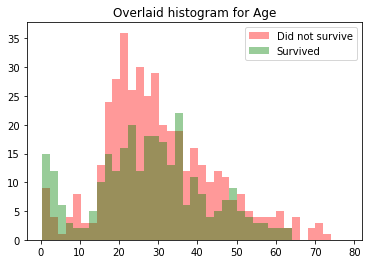

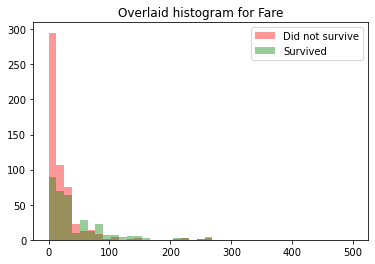

In [6]:
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

Now we are going to plot the categorical ordinal variables with a categorical plot. where we can plot the survival level for each feature

<Figure size 432x288 with 0 Axes>

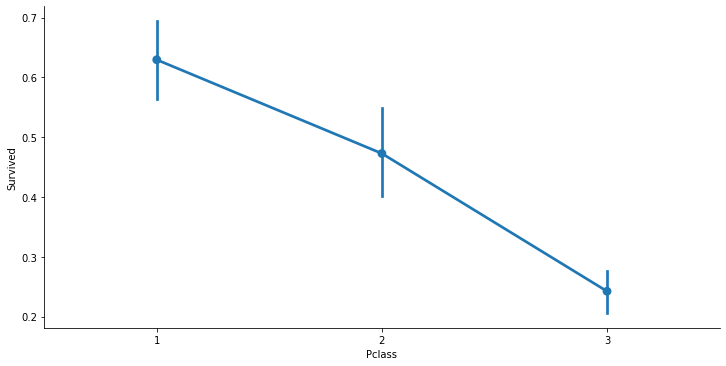

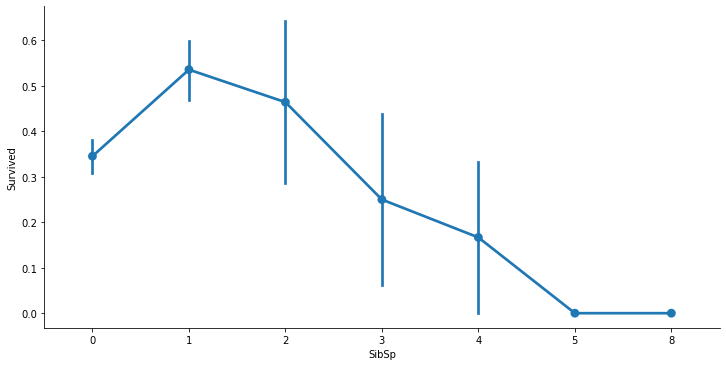

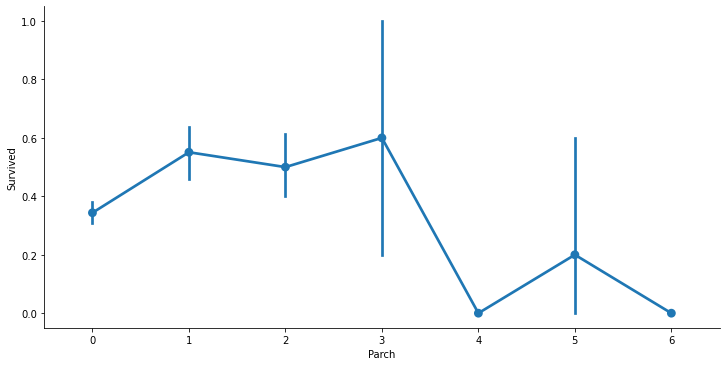

In [7]:
#defining the order in which we created this:

#1-sns.catplot(x=, y="Survived", data=titanic, kind="point", aspect=2)

#2-Since we want to do the same in three categorial varialbles (graph) so before filling x and y we are going to create a loop
#for col in ["Pclass", "SibSp", "Parch "]:
    #sns.catplot(x=col, y="Survived", data=titanic, kind="point", aspect=2)

#3-#now sboarn needs to know that it needs to create a plot per variable so we are going to add indexes to this list with the enumerate() method and add i (index) to the loop
#for i, col in enumerate(["Pclass", "SibSp", "Parch "]):
    #plt.figure(i)
#all together:

for i, col in enumerate(["Pclass", "SibSp", "Parch"]):
    plt.figure(i)
    sns.catplot(x=col, y="Survived", data=titanic, kind="point", aspect=2)

In the graphs we can see in the Y axis the percentage of people who survived in each category and the vertical little bars are the error. So, if we had a lot of data and the bars are very small, we could be pretty confident about the data.
First class is more likely to survive than third class
People with more siblings are less likely to survive 
and lastly those with more parents or children are less llikely to survive.  It is not as clean graph
It looks like Parch and SibSp behave similar as more family they had in the boat less likely are to survive.  So we will explore merging these two variables


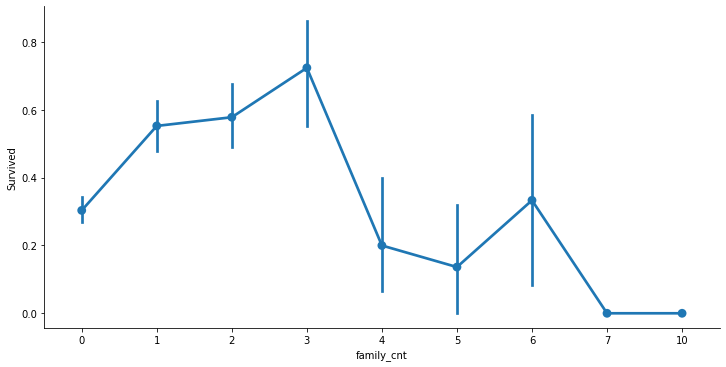

In [9]:
titanic["family_cnt"] = titanic["SibSp"] + titanic["Parch"]
sns.catplot(x="family_cnt", y="Survived", data=titanic, kind="point", aspect=2)

In [ ]:
#even though we see a high in the graph, in general we see that the pattern is as more family you had less likelihood of survival